# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

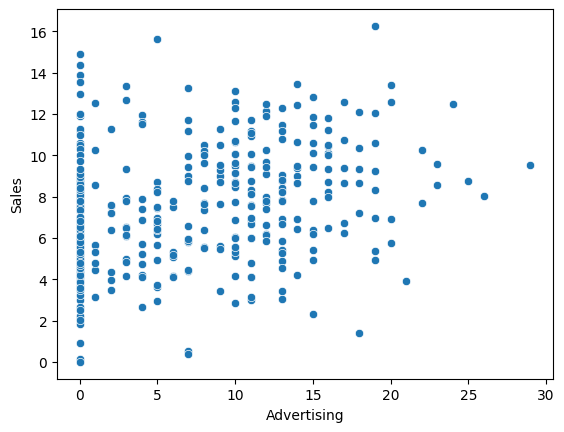

In [3]:
target = 'Sales'
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

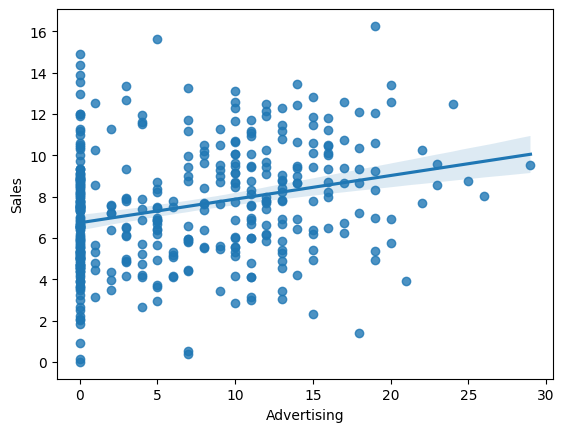

In [4]:
sns.regplot(x=var, y = target, data = data)
plt.show()

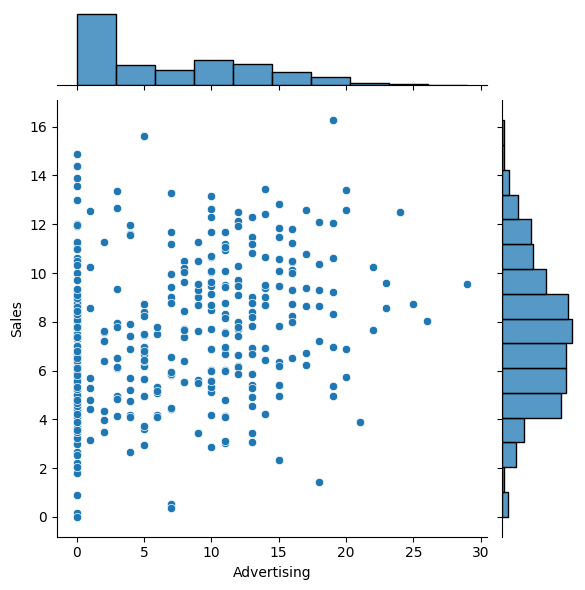

In [5]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [6]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

### (2) Population -> Sales

1) 시각화 : scatter(regplot), jointplot

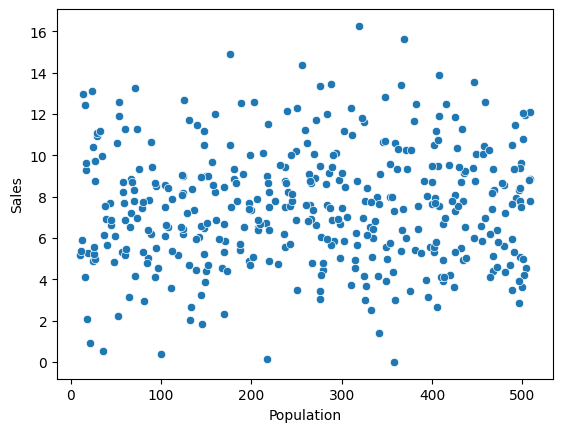

In [7]:
target = 'Sales'
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

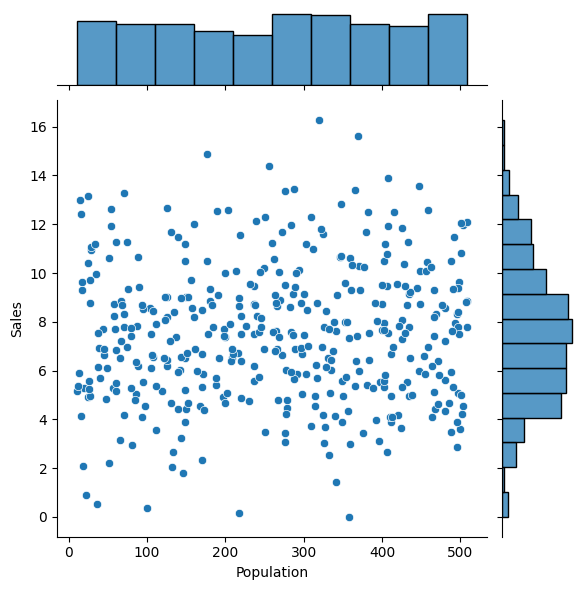

In [8]:
sns.jointplot(x=var, y=target, data=data)

2) 수치화 : 상관분석

In [9]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=0.0504709844720392, pvalue=0.31398160931904856)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 인구가 많다고 해서 판매량으로 이어지지는 않는다
* 인구, 판매량이 골골루 분포되어 있다

### (3) Price -> Sales

1) 시각화 : scatter(regplot), jointplot

<Axes: xlabel='Price', ylabel='Sales'>

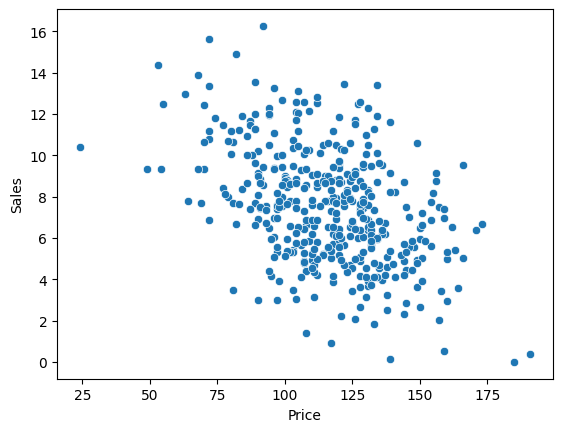

In [10]:
var = 'Price'
target = 'Sales'

sns.scatterplot(x=var, y=target, data=data)

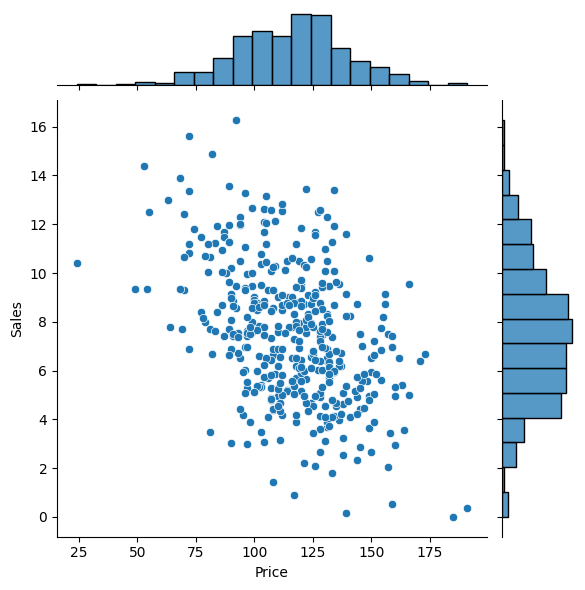

In [11]:
sns.jointplot(x=var, y=target, data=data)

2) 수치화 : 상관분석

In [12]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=-0.4449507278465726, pvalue=7.618187011913169e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 가격에 따라 판매량이 달라진다
* 100 ~ 125 달라 사이가 많으나 대부분 이정도 가격에 판매하는 것으로 보임
* 가장 싸게 팔고 있는 25달러 짜리도 판매량이 높음을 보임
* 가격이 높아 질수록 판매량이 감소가 보임

### (4) Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [23]:
var = 'Age'
target ='Sales'

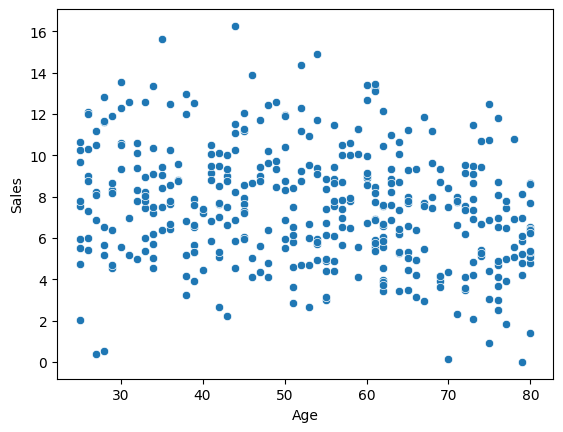

In [24]:
sns.scatterplot(x=var, y=target, data=data)
plt.show()

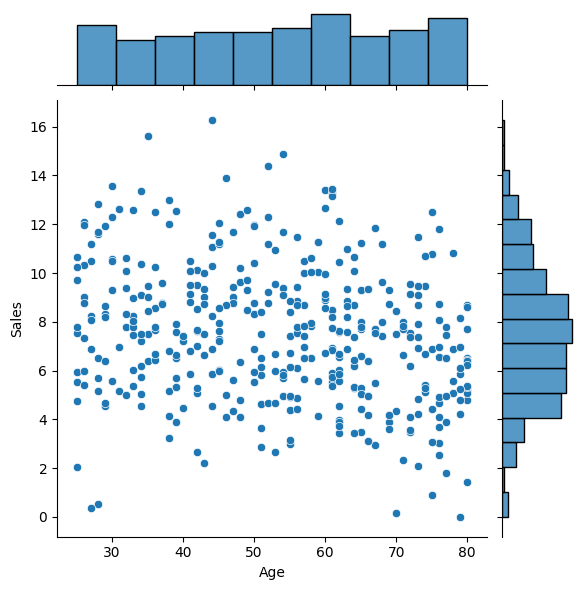

In [25]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [22]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=-0.4449507278465726, pvalue=7.618187011913169e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 나이에 따라 판매량의 변화는 관계가 없어 보임
* 특정 나이대에 판매량이 있는 것을 보아 어린 자녀들이 있는 것으로 보임

### (5) CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

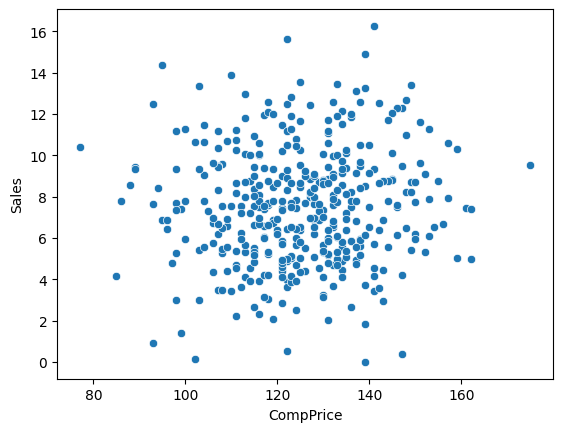

In [26]:
var = 'CompPrice' # 지역별 경쟁사 판매 가격
target = 'Sales'

sns.scatterplot(x=var, y=target, data=data)
plt.show()

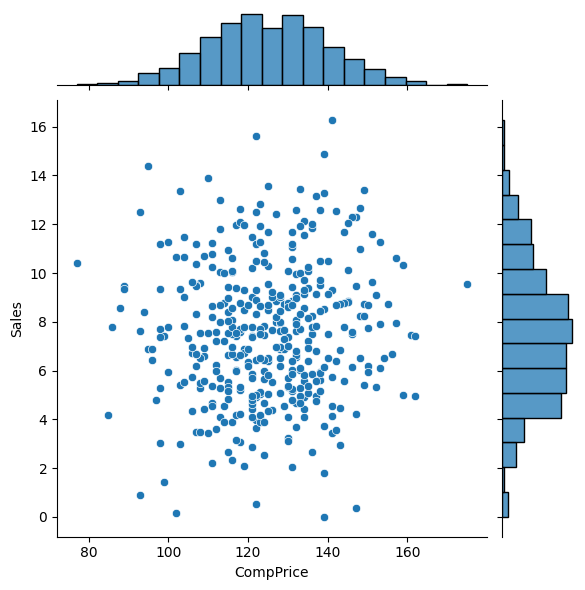

In [28]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

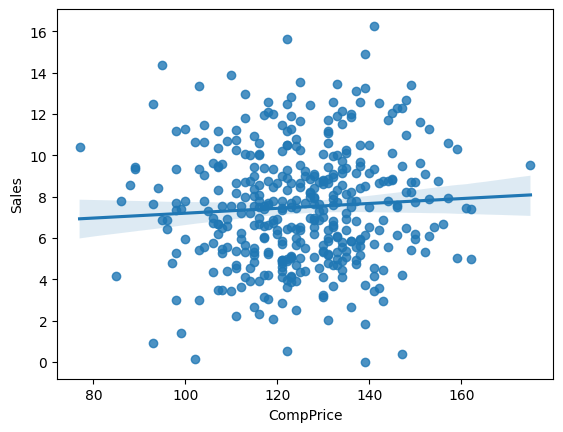

In [30]:
sns.regplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [29]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=0.06407872955062152, pvalue=0.2009398289418404)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 경쟁사 가격에 따라 판매량이 관계가 있어 보이지는 않음
* 약 110 ~ 140달러 사이에 판매량이 대부분
* 경쟁사의 판매 가격대를 알아봐야 할것 같음

In [53]:
data['Price_diff'] = data['CompPrice'] - data['Price'] # 타사, 자사의  가격 경쟁력
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


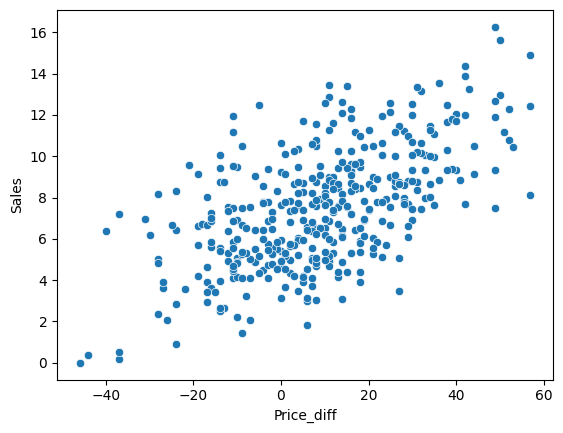

In [55]:
# 피처 엔지니어링 #비지니스 관점으로 재해석
var = 'Price_diff'
target = 'Sales'

sns.scatterplot(x=var, y=target, data=data)
plt.show()

In [56]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=0.5979217124533921, pvalue=3.877120641788767e-40)

### (6) Income -> Sales

1) 시각화 : scatter(regplot), jointplot

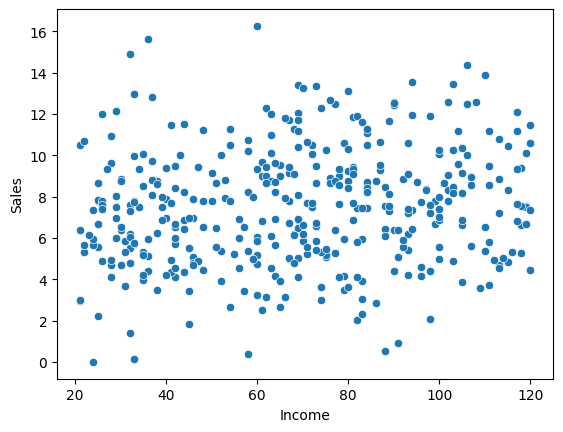

In [36]:
var = 'Income' # 지역 주민 평균 소득
target = 'Sales'

sns.scatterplot(x=var, y=target, data=data)
plt.show()

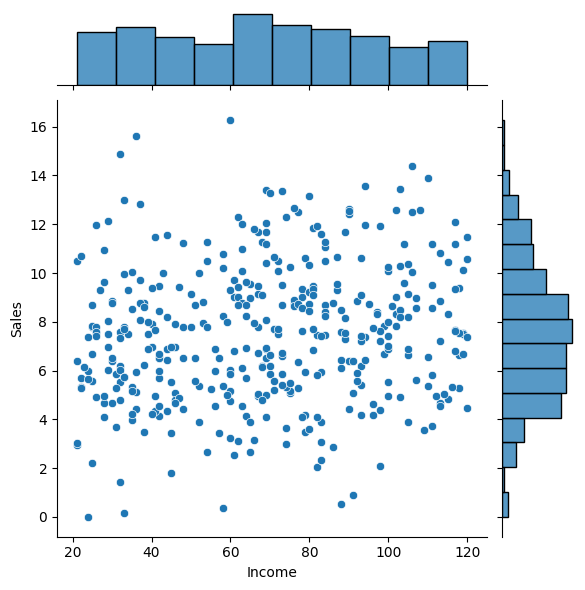

In [38]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [39]:
spst.pearsonr(data[var], data[target])

PearsonRResult(statistic=0.15195097946754424, pvalue=0.0023096704539517904)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 지역 소득에 따라 판매량에 관계는 약한 상관관계

## 2.범주형 X --> Y

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

In [71]:
def ed_bar(data, var, target):
    # barplot 시각화
    sns.barplot(x=bar, y=target, data=data)
    plt.show()

### (1) Urban -> Sales

1) 시각화 : 평균비교 barplot

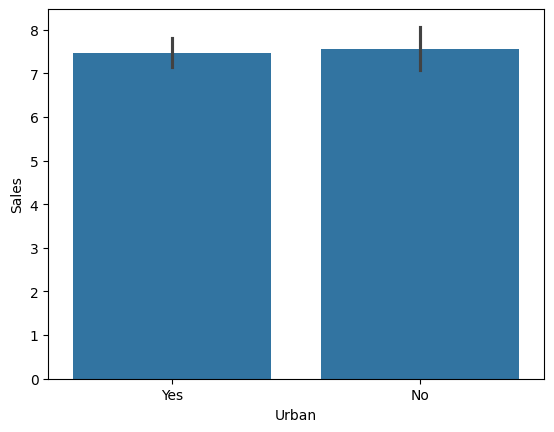

In [40]:
var = 'Urban' # 도심 여부
target = 'Sales'

sns.barplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : t-test, anova

In [45]:
# 두 그룹으로 데이터 저장
Y_Urban = data.loc[data['Urban']=='Yes', 'Sales']
N_Urban = data.loc[data['Urban']=='No', 'Sales']

In [46]:
# 독립표본 T-테스트
t_statistic, p_value = spst.ttest_ind(Y_Urban, N_Urban)

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -0.30765346670661126
P-value: 0.7585069603942775


In [48]:
# anova
a_statistic, p_value = spst.f_oneway(Y_Urban, N_Urban)

# 결과 출력
print("T-a_statistic:", a_statistic)
print("P-value:", p_value)

T-a_statistic: 0.09465065557659712
P-value: 0.7585069603942085


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 차트 p-value를 barplot 차트를 봐도 도심여부에 따라 판매량 증가에 대해서는 관련이 없어 보임

### (2) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

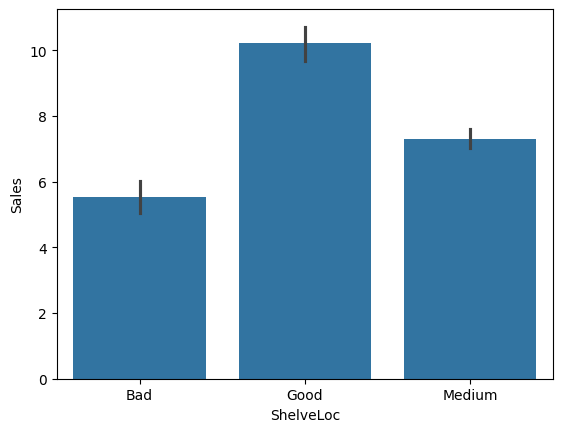

In [74]:
var = 'ShelveLoc' # 진열상태
target= 'Sales'

sns.barplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : t-test, anova

In [75]:
# 세 그룹으로 데이터 저장
Good = data.loc[data[var]=='Good', 'Sales']
Medium = data.loc[data[var]=='Medium', 'Sales']
Bad = data.loc[data[var]=='Bad', 'Sales']

In [51]:
# 독립표본 T-테스트
temp = spst.ttest_ind(Good, Medium)
t_statistic, p_value = spst.ttest_ind(temp, Bad)
# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -0.37131177056842923
P-value: 0.711223539704839


In [76]:
t_statistic, P_value =  spst.f_oneway(Good, Medium, Bad)

# 결과 출력
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 92.22990509910349
P-value: 0.711223539704839


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* barplot 그래프 상으로는 진열 상태가 좋을 수록 판매량이 증가가 보임
* t 테스트 및 p_value는 상관이 없다 나옴

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

In [59]:
var = 'US' # 미국에 있는 매장 여부
target = 'Sales'

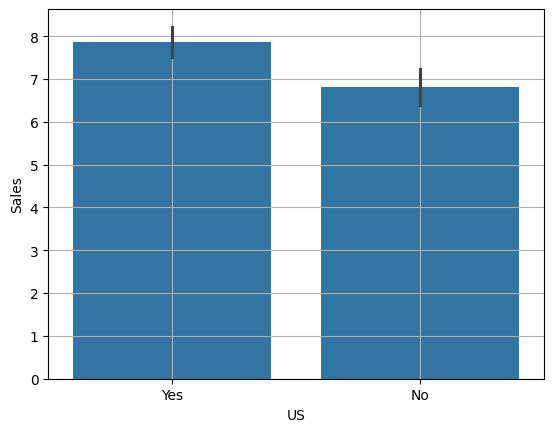

In [69]:
sns.barplot(x=var, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [64]:
Y_US = data.loc[data[var] == 'Yes', target]
N_US = data.loc[(data[var] == 'No', target)]

In [67]:
t_statistic, P_value = spst.ttest_ind(Y_US, N_US)
print('t_statistic :', t_statistic)
print('P_value :', P_value)

t_statistic : 3.589738747802499
P_value : 0.00037233958701471517


In [68]:
a_statistic, P_value = spst.f_oneway(Y_US, N_US)

print('a_statistic :', a_statistic)
print('P_value :', P_value)

a_statistic : 12.886224277474618
P_value : 0.0003723395870148404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 미국 내에 매장이 판매량이 높은 것을 알수 있다
* 그래프를 보면 신뢰구간에 아주 약간 겹치는 구간이 있다

## 3.관계 정리하기

① 강한관계

* Price->Sales
* Age->Sales
* Income->Sales
* ShelveLoc->Sales

② 중간관계

* Advertising->Sales
* CompPrice->Sales
* US->Sales

③ 관계없음

* Population->Sales
* Urban->Sales